In [1]:
import pandas as pd
import json
import numpy as np
import sys
import os
import torch
%load_ext autoreload
%autoreload 2
dir= os.getcwd()
sys.path.append(dir)
sys.path.append(dir.replace('/benchmark',''))
from predict import save_preds

with open(f'{dir}/results/results.json','r') as f:
    df=json.load(f)

with open(f'{dir}/results/results_mtl.json','r') as f:
    df_mtl=json.load(f)# print(len(df['PLEX']['1']['DR']))
# print(df)
unet=df['ACDC']['5']['UNet']
mtl=df_mtl['ACDC']['6']['MTL']
checkpoints=mtl[0]['ckpt_path']
state=torch.load(checkpoints.replace('benchmark/',''))
print(state['hyper_parameters'])
save_preds(0,'ACDC','6','MTL',mtl[0])
# print(state['callbacks'].keys())
# truc=pd.DataFrame({'MTL':mtl.mean(),'UNet':unet.mean()}).drop('test_accuracy')
# truc

# for ds in df.keys():
#     for n_train in df[ds].keys():
#         for model in df[ds][n_train].keys():
#             for exp_idx,exp in enumerate(df[ds][n_train][model]):
#                 save_preds(exp_idx,ds,n_train,model,exp,taa=True)
# save_preds(0,'PLEX','11','DR',df['PLEX']['11']['DR'][0],True)
# print(df['PLEX']['1']['UNet'][0]['test_ids'][0])
# list(unet[['taa_test_accuracy_lab0']])


Bad key savefig.frameon in file /home/nathan/miniconda3/envs/simclr/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /home/nathan/miniconda3/envs/simclr/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /home/nathan/miniconda3/envs/simclr/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sy

{'n_classes': 4, 'n_filters_recon': 64, 'n_filters_seg': 64, 'n_features': 8, 'patch_size': (416, 312), 'learning_rate': 0.0001, 'weight_decay': 1e-08, 'taa': False, 'supervised': True}
Truc
dict_keys(['epoch', 'global_step', 'pytorch-lightning_version', 'state_dict', 'callbacks', 'optimizer_states', 'lr_schedulers', 'hparams_name', 'hyper_parameters'])
Augmentation :  False


/home/nathan/miniconda3/envs/simclr/lib/python3.7/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


torch.Size([20, 4, 256, 256])
torch.Size([20, 4, 256, 256])
tensor(nan)
Label 1 DICE : 2.8383623137095104)
Label 2 DICE : 24.893067052343294)
Label 3 DICE : 44.152398325110894)
avec boucle 2.7443298253734247


In [35]:
sigma_seg=[]
sigma_recon=[]
for exp in df_mtl['ACDC']['5']['MTL']:
    state=torch.load(exp['ckpt_path'].replace('benchmark/',''))
    sigma_seg.append(float(state['state_dict']['loss_model.sigmas.recon']))
    sigma_recon.append(float(state['state_dict']['loss_model.sigmas.seg']))



/home/nathan/miniconda3/envs/simclr/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/nathan/miniconda3/envs/simclr/lib/python3.7/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


KeyError: 'exp'

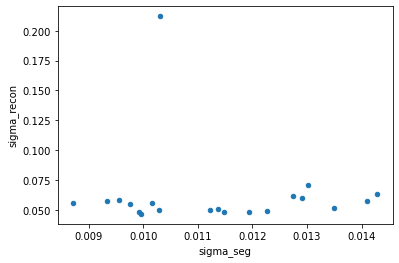

In [64]:
sigmas=pd.DataFrame({'sigma_seg':sigma_seg,'sigma_recon':sigma_recon})
plot=sigmas.plot.scatter('sigma_seg','sigma_recon')#(sigmas.columns[0],sigmas.columns[1])
plot
sigmas

<AxesSubplot:>

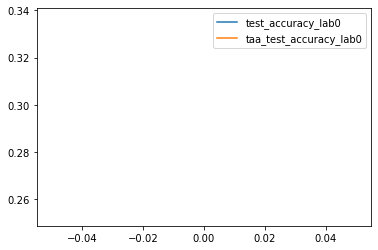

In [6]:
dr=pd.DataFrame(df['PLEX']['1']['DR'])
dr.plot()